In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering:

In [2]:
df=pd.read_csv(r"car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.shape

(301, 9)

In [8]:
df["Car_Name"].value_counts()

city                    26
corolla altis           16
verna                   14
fortuner                11
brio                    10
                        ..
KTM 390 Duke             1
Hero Passion X pro       1
omni                     1
Bajaj Pulsar  NS 200     1
KTM RC390                1
Name: Car_Name, Length: 98, dtype: int64

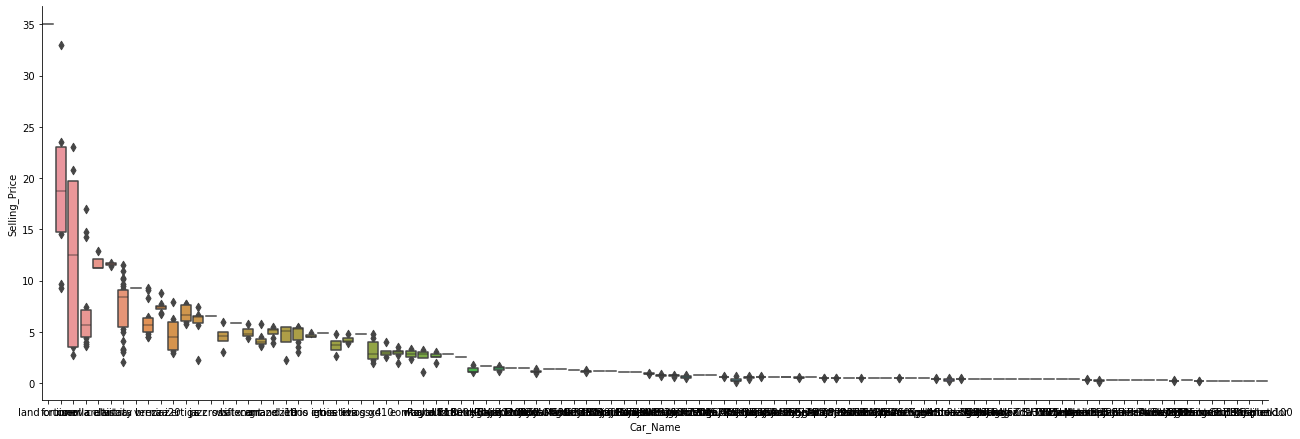

In [9]:
sns.catplot(x="Car_Name",y="Selling_Price" , data=df.sort_values("Selling_Price",ascending=False) , kind="boxen",height=6 ,aspect=3)

In [10]:
#As the names of cars has length of 98 so we have to drop it due to huge length it can slow our model as 
#so we are not converting its object into int as it is not much imp x so we are droppoing it.
df.drop(["Car_Name"], axis=1 ,inplace=True)

In [11]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [12]:
df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [13]:
df=pd.get_dummies(df , drop_first=True)

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [15]:
df["Age"]=2020-df["Year"]
df.drop(["Year"],axis=1, inplace=True)

In [16]:
df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age
0,3.35,5.59,27000,0,0,1,0,1,6
1,4.75,9.54,43000,0,1,0,0,1,7


array([[<AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>,
        <AxesSubplot:title={'center':'Fuel_Type_Diesel'}>,
        <AxesSubplot:title={'center':'Fuel_Type_Petrol'}>],
       [<AxesSubplot:title={'center':'Seller_Type_Individual'}>,
        <AxesSubplot:title={'center':'Transmission_Manual'}>,
        <AxesSubplot:title={'center':'Age'}>]], dtype=object)

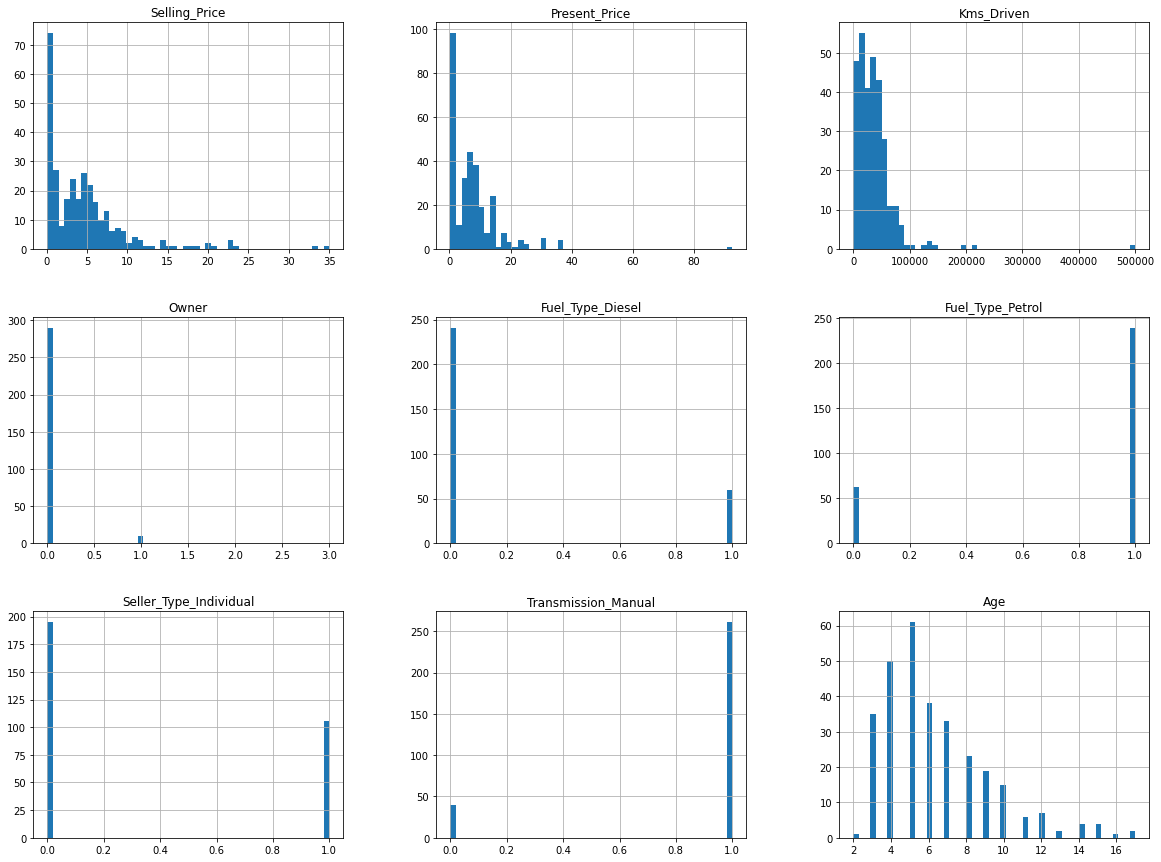

In [17]:
%matplotlib inline
df.hist(bins=50,figsize=(20,15))

# Correlations:

In [18]:
corr_mat=df.corr()
corr_mat["Selling_Price"].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
Age                      -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

<AxesSubplot:xlabel='Present_Price', ylabel='Selling_Price'>

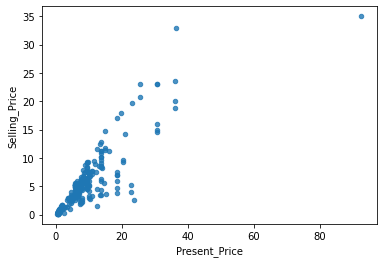

In [19]:
df.plot(kind="scatter", x="Present_Price",y="Selling_Price",alpha=0.8)

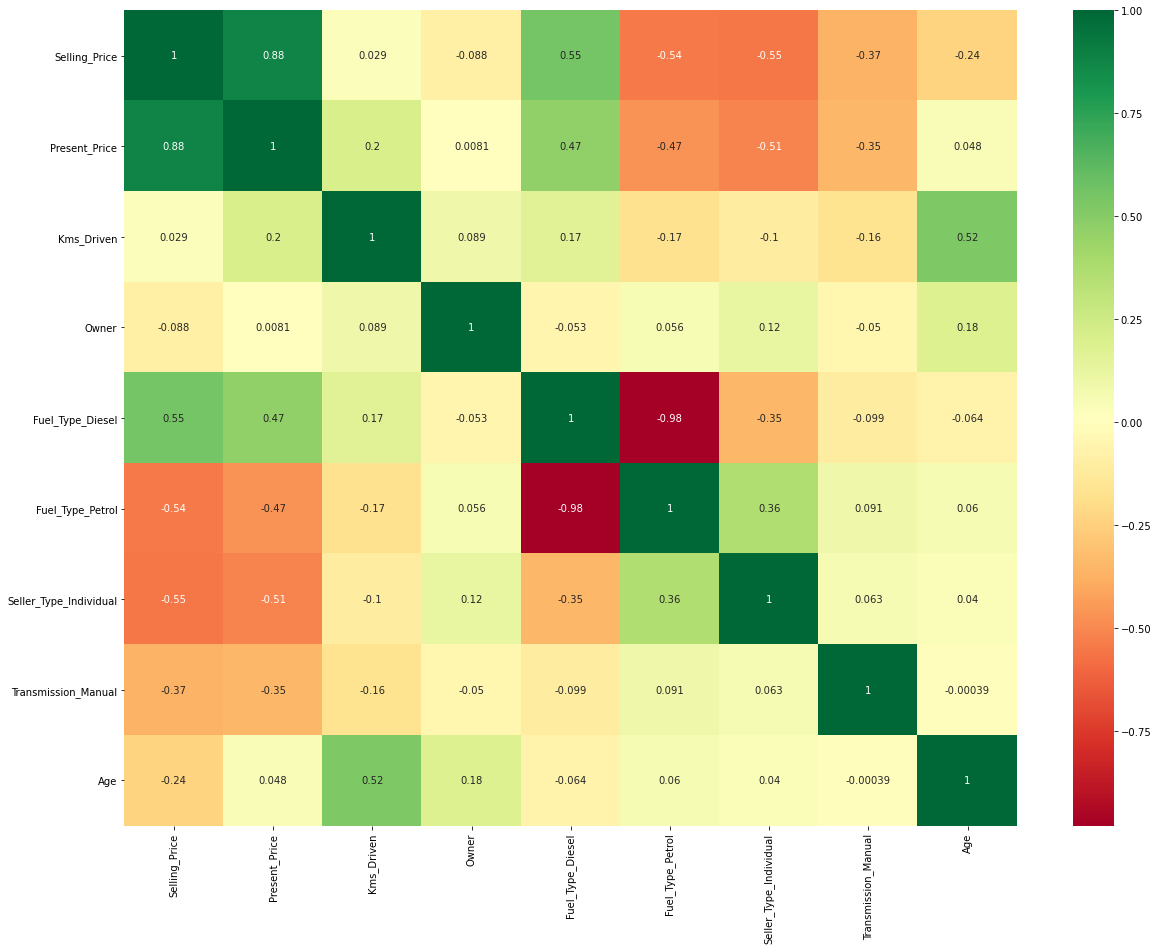

In [20]:
corrmat=df.corr()
top_features=corrmat.index
plt.figure(figsize=(20,15))
g=sns.heatmap(df[top_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual', 'Age'],
      dtype='object')

In [22]:
features=df.iloc[:,1:]

In [23]:
label=df.iloc[:,0]

In [24]:
df.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Age
0,3.35,5.59,27000,0,0,1,0,1,6
1,4.75,9.54,43000,0,1,0,0,1,7


# Train Test  Splitting:

In [25]:
from sklearn.model_selection import train_test_split
features_train ,features_test, label_train ,label_test=train_test_split(features,label,test_size=0.2,random_state=42)

In [26]:
features.shape

(301, 8)

In [27]:
label.shape

(301,)

In [28]:
label

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [29]:
#To check that the features are correctly distributed among train and test sets.
features_train["Fuel_Type_Diesel"].value_counts()

0    195
1     45
Name: Fuel_Type_Diesel, dtype: int64

In [30]:
features_test["Fuel_Type_Diesel"].value_counts()

0    46
1    15
Name: Fuel_Type_Diesel, dtype: int64

In [31]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(features_train , label_train)

RandomForestRegressor()

# Hyperparameter tunning:

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
#Number of trees in RandomForest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at every split
max_features=["auto", "sqrt", "log2"]
#Max numbers of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,6)]
#Minimun no.of samples required at each leaf node
min_samples_leaf=[1,2,5,8]
#Mininum number of samples at each node to split
min_samples_split = [2, 5, 10, 15, 100]


In [34]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 8]}


In [35]:
rf=RandomForestRegressor()

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
rf_random=RandomizedSearchCV(estimator=rf , param_distributions=random_grid , scoring="neg_mean_squared_error" , n_iter=10 , verbose=2 , n_jobs=-1)

# Model Fitting: 

In [38]:
rf_random.fit(features_train,label_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 8],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [40]:
rf_random.best_score_

-3.768239504135728

In [42]:
prediction=rf_random.predict(features_test)

C:\Users\al hamad mobile\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

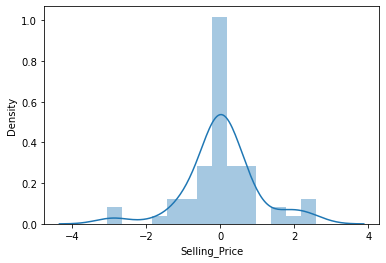

In [43]:
sns.distplot(prediction-label_test)

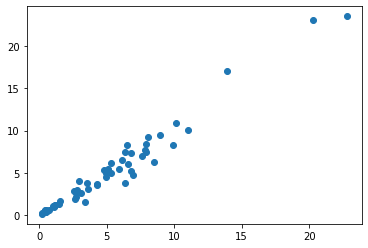

In [44]:
plt.scatter(prediction,label_test)

In [46]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(label_test,prediction))
print("MSE:",metrics.mean_squared_error(label_test,prediction))
print("RMSE:",np.sqrt(metrics.mean_absolute_error(label_test,prediction)))

MAE: 0.6309299019941816
MSE: 0.940202658257174
RMSE: 0.7943109605149495


Thankyou So much for consider it.
          ******RAFAY AHMAD*******